# -------------- Amirmohammad Khosravi Esfezar --------------

# ----------------------- S.N.: 810198386 -----------------------

# Project: 
Introduction to machine learning technics using Scikit-Learn library
# Description: 
In this project we have a set of data (cast, release year, country and ...) about some movies and we are going to train a model (decision tree) to predict type of movies.

Here we import libraries we will need during the project.

In [1]:
import pandas
import numpy
import matplotlib
import statistics
import time
import math
from numpy.linalg import inv
import matplotlib.pyplot as pyplt
import seaborn as sns
from sklearn import preprocessing, feature_extraction, feature_selection, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Reading movies data from dataset.csv file and saving it in a data frame called moviesDf.

In [2]:
moviesDf = pandas.read_csv('dataset.csv')

In [3]:
moviesDf

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


# Solving the problem:

# Phase 0: Analysing the data
First step in every machine learning project is to check, analize and finding relations between data. For this we use following steps: 

# 1:
Here call describe method for eath column of data frame and check their features. 

In [4]:
for column in moviesDf:
    print("=" * 60)
    countEqual = int((60 - len(column)) / 2)
    print("=" * countEqual, column, "=" * (58 - countEqual - len(column)))
    print(moviesDf[column].describe())
print("=" * 60)

============================ type ==========================
count     11059
unique        2
top       Movie
freq       6131
Name: type, dtype: object
=========================== title ==========================
count              11059
unique             10957
top       Sister, Sister
freq                   2
Name: title, dtype: object
============================ cast ==========================
count                   9694
unique                  9307
top       David Attenborough
freq                      20
Name: cast, dtype: object
========================== country =========================
count              8364
unique              760
top       United States
freq               3105
Name: country, dtype: object
======================== release_year ======================
count    11059.000000
mean      2014.209603
std          8.959517
min       1925.000000
25%       2013.000000
50%       2017.000000
75%       2019.000000
max       2021.000000
Name: release_year, dtype: float64


As we can see we have some object and float data. Type column has only 2 different values. Other columns are mostly unique. Country and listed_in columns has less unique values. We can also see describe() output for release_year which contains mean, min, max, and quarters.

Here we use info method to obsereve number of null objects in different columns:

In [5]:
print(moviesDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB
None


As we can see cast and country have some null (NA) values. Other columns have no null (NA) values. Only release_year has int type values, others have object type values.

# 2:
Here we count Na values for each column and show percentage of Na (lost) values for each.

In [6]:
(moviesDf.isna().sum() / (moviesDf.shape[0])) * 100
print((moviesDf.isna().sum() / (moviesDf.shape[0])) * 100)

type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64


As we can see about 12 percent of cast column values are lost (are NA) and also about 24 percent of release_year values are lost too.

# Phase 1: Preprocessing

The most important step in a machine learning project is preprocessing. Here we convert input data to a processable data, For this we do following steps.

# 1:
There are several ways to handle NA values. We explain two of them and apply one on the data.
**First approach:** Drop (delete) rows with at least one Nans.
**Second approach:** Fill the Nan values with mode of values in the same column
**Our approach:** For cast column we delete rows with Nan values cause its not logical to assign a set of actors or actresses to a moive because there is a high probabaility that we assign all of them wrong.
For country column we fill Nan values with country column mode.
We can change our approach by commenting the next line and uncommenting the next two lines after it. it will fill all Nans with mode.

In [8]:
moviesDf = moviesDf.dropna(subset = ['cast'])
# moviesDf.fillna(moviesDf['cast'].mode().iloc[0], inplace=True)
# moviesDf.fillna(moviesDf['country'].mode().iloc[0], inplace=True)
moviesDf.fillna(moviesDf.mode().iloc[0], inplace=True)
moviesDf.isna().sum()

type            0
title           0
cast            0
country         0
release_year    0
listed_in       0
description     0
dtype: int64

As we can see we don't have any Nan values.

# 2:
Feature scaling is one of the most important data preprocessing step in machine learning. Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.
Tree-based algorithms are fairly insensitive to the scale of the features. Also, feature scaling helps machine learning, and deep learning algorithms train and converge faster.
Now we explain Normalization vs Standardization a little bit.

**Normalization or Min-Max Scaling** is used to transform features to be on a similar scale. The new point is calculated as:
$$X_new = (X - X_min)/(X_max - X_min)$$
This scales the range to [0, 1] or sometimes [-1, 1]. Normalization is useful when there are no outliers as it cannot cope up with them. Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.

**Standardization or Z-Score Normalization** is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.
$$X_new = (X - mean)/Std$$
Standardization can be helpful in cases where the data follows a Gaussian distribution. Standardization does not get affected by outliers because there is no predefined range of transformed features.

resource: https://www.geeksforgeeks.org/normalization-vs-standardization/

**Our choice:** We don't have outliers in our data and there is no difference between using Standardization and Normalization. Here we use Normalization for release_year because it scale all values into a number between 0 to 1. 

In [9]:
minMaxScaler = preprocessing.MinMaxScaler()
# min_max_scaler.fit(data)
normedMoviesDf = moviesDf.copy(deep=True)
normedMoviesDf['release_year'] = minMaxScaler.fit_transform(pandas.DataFrame(moviesDf['release_year']))

normedMoviesDf

,type,title,cast,country,release_year,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,1.000000,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,1.000000,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,1.000000,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,0.764045,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,0.719101,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,0.921348,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.943820,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


# 3:
To handle categorical data there is several ways. Here we explain two of them:

**Label Encoding or Ordinal Encoding:** We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.
In Label encoding, each label is converted into an integer value. We will create a variable that contains the categories representing the education qualification of a person.

**One Hot Encoding:** We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.
These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable. 

**Our approach:** Here we use label encoding because it has better representation but it makes almost no difference using each approach. And one thing is that our data is not ordinal. Here we just apply label encoding on country because other columns will change in next steps. After next step we can encode other columns but its not necessery. The code for encoding them is like below.

resource: Here’s All you Need to Know About Encoding Categorical Data (with Python code) article by Shipra Saxena

In [10]:
label_encoder = preprocessing.LabelEncoder()
normedMoviesDf['country'] = label_encoder.fit_transform(normedMoviesDf['country'])

normedMoviesDf

,type,title,cast,country,release_year,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",395,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",564,1.000000,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",227,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",564,1.000000,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",564,1.000000,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",564,0.764045,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",564,0.719101,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",564,0.921348,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",53,0.943820,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


# 4:
We can keep 3 genres for each movie and drop the others and if a movie has less than 3 genres we can give the remaining genres with genres mode (not recommanded) or we can use the other genres of the movie for filling the the remaining genres to have 3 genres for each movie. After that we can split each row and in each row have the same movie but with one of its genres. This method will increase our data size which is not good. Another way is to make 3 columns and save each genre in one. So for each movie we have 3 columns that contains 3 genres.

In [11]:
genres = normedMoviesDf["listed_in"].str.split(',', 2, expand=True)
genres = genres.fillna(method='ffill', axis=1)
normedMoviesDf.insert(5, "genre1", genres[0])
normedMoviesDf.insert(6, "genre2", genres[1])
normedMoviesDf.insert(7, "genre3", genres[2])
normedMoviesDf.drop(columns=['listed_in'], inplace=True)

In [12]:
normedMoviesDf

,type,title,cast,country,release_year,genre1,genre2,genre3,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",395,1.000000,International TV Shows,TV Dramas,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",564,1.000000,Crime TV Shows,International TV Shows,TV Action & Adventure,To protect his family from a powerful drug lor...
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",227,1.000000,International TV Shows,Romantic TV Shows,TV Comedies,In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",564,1.000000,TV Dramas,TV Horror,TV Mysteries,The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",564,1.000000,Children & Family Movies,Children & Family Movies,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",564,0.764045,Action-Adventure,Animation,Kids,X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",564,0.719101,Comedy,Coming of Age,Kids,A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",564,0.921348,Action-Adventure,Comedy,Coming of Age,Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",53,0.943820,Action-Adventure,Comedy,Science Fiction,Ryan discovers his ability to control a giant ...


As we can see for all movies we have 3 genres in 3 columns called genre1, genre2 and genre3. Some movies have repetitive genres because they had less than 3 genres.

# Extracting feature from text:
We have some columns such as title, description and cast which contain text. To handle that we use count vectorizer. We find most common words and then we check if these common words exist for each movie data or not, If yes the column of that word get value of 1 else it gets 0. For cast column we do the same thing. As we can see we will have 60 now columns which are related to 50 common words in title and description and 10 actors or actresses which are more common. As we can see in next Phase; using count vectorizing, we get the accuracy of 98 which shows count vectorizing helps us with our model.

In the next cell we remove spaces between first and last names of actors and actresses so the full name will be just one name.

In [13]:
normedMoviesDf['cast'] = [cast.replace(' ', '') for cast in normedMoviesDf['cast']]

# Count vectorizer:
Here we use count vectorizer for title + description:

In [14]:
descriptionData = [i for i in normedMoviesDf['description']]
titleData = [i for i in normedMoviesDf['title']]
descAndTitleData = [t[0] + t[1] for t in zip(descriptionData, titleData)]
descAndTitleVectorizer = feature_extraction.text.CountVectorizer(analyzer='word', max_features=50, stop_words='english')
descAndTitleFeatures = descAndTitleVectorizer.fit_transform(descAndTitleData)
countVecDf = pandas.DataFrame(descAndTitleFeatures.toarray(), 
                            index=['sentence '+str(i) for i in range(1, 1+len(descriptionData))],
                            columns=descAndTitleVectorizer.get_feature_names_out())
for feature in countVecDf:
    normedMoviesDf[feature] = list(countVecDf[feature])
    
normedMoviesDf

,type,title,cast,country,release_year,genre1,genre2,genre3,description,best,...,town,true,war,way,wife,woman,world,year,years,young
1,TV Show,Blood & Water,"AmaQamata,KhosiNgema,GailMabalane,ThabangMolab...",395,1.000000,International TV Shows,TV Dramas,TV Mysteries,"After crossing paths at a party, a Cape Town t...",0,...,1,0,0,0,0,0,0,0,0,0
2,TV Show,Ganglands,"SamiBouajila,TracyGotoas,SamuelJouy,NabihaAkka...",564,1.000000,Crime TV Shows,International TV Shows,TV Action & Adventure,To protect his family from a powerful drug lor...,0,...,0,0,1,0,0,0,0,0,0,0
4,TV Show,Kota Factory,"MayurMore,JitendraKumar,RanjanRaj,AlamKhan,Ahs...",227,1.000000,International TV Shows,Romantic TV Shows,TV Comedies,In a city of coaching centers known to train I...,0,...,0,0,0,0,0,0,0,0,0,0
5,TV Show,Midnight Mass,"KateSiegel,ZachGilford,HamishLinklater,HenryTh...",564,1.000000,TV Dramas,TV Horror,TV Mysteries,The arrival of a charismatic young priest brin...,0,...,1,0,0,0,0,0,0,0,0,1
6,Movie,My Little Pony: A New Generation,"VanessaHudgens,KimikoGlenn,JamesMarsden,SofiaC...",564,1.000000,Children & Family Movies,Children & Family Movies,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"NoelFisher,VincentGale,ChristopherJudge,DavidK...",564,0.764045,Action-Adventure,Animation,Kids,X-Men: Evolution features the team as teenager...,0,...,0,0,0,0,0,0,1,0,0,0
11055,TV Show,Smart Guy,"TahjMowry,JohnJones,JasonWeaver,EssenceAtkins",564,0.719101,Comedy,Coming of Age,Kids,A genius tries to fit in as a high school soph...,0,...,0,0,0,0,0,0,0,0,0,0
11056,TV Show,Disney Kirby Buckets,"JacobBertrand,MekaiCurtis,CadeSutton,OliviaStu...",564,0.921348,Action-Adventure,Comedy,Coming of Age,Welcome to Kirby's world! It's rude and sketchy.,0,...,0,0,0,0,0,0,1,0,0,0
11057,TV Show,Disney Mech-X4,"NathanielPotvin,RaymondCham,KamranLucas,Pearce...",53,0.943820,Action-Adventure,Comedy,Science Fiction,Ryan discovers his ability to control a giant ...,0,...,0,0,0,0,0,0,0,0,0,0


Here we use count vectorizer for cast:

In [15]:
castData = [i for i in normedMoviesDf['cast']]
castVectorizer = feature_extraction.text.CountVectorizer(analyzer='word', max_features=10, stop_words='english')
castFeatures = castVectorizer.fit_transform(castData)
countVecDf2 = pandas.DataFrame(castFeatures.toarray(), 
                            index=['sentence '+str(i) for i in range(1, 1+len(castData))],
                            columns=castVectorizer.get_feature_names_out())
for feature in countVecDf2:
    normedMoviesDf[feature] = list(countVecDf2[feature])

print(castVectorizer.get_feature_names_out())
normedMoviesDf

['anupamkher' 'eun' 'hee' 'ho' 'hyun' 'jin' 'min' 'shahrukhkhan' 'won'
 'young']


,type,title,cast,country,release_year,genre1,genre2,genre3,description,best,...,young,anupamkher,eun,hee,ho,hyun,jin,min,shahrukhkhan,won
1,TV Show,Blood & Water,"AmaQamata,KhosiNgema,GailMabalane,ThabangMolab...",395,1.000000,International TV Shows,TV Dramas,TV Mysteries,"After crossing paths at a party, a Cape Town t...",0,...,0,0,0,0,0,0,0,0,0,0
2,TV Show,Ganglands,"SamiBouajila,TracyGotoas,SamuelJouy,NabihaAkka...",564,1.000000,Crime TV Shows,International TV Shows,TV Action & Adventure,To protect his family from a powerful drug lor...,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,Kota Factory,"MayurMore,JitendraKumar,RanjanRaj,AlamKhan,Ahs...",227,1.000000,International TV Shows,Romantic TV Shows,TV Comedies,In a city of coaching centers known to train I...,0,...,0,0,0,0,0,0,0,0,0,0
5,TV Show,Midnight Mass,"KateSiegel,ZachGilford,HamishLinklater,HenryTh...",564,1.000000,TV Dramas,TV Horror,TV Mysteries,The arrival of a charismatic young priest brin...,0,...,0,0,0,0,0,0,0,0,0,0
6,Movie,My Little Pony: A New Generation,"VanessaHudgens,KimikoGlenn,JamesMarsden,SofiaC...",564,1.000000,Children & Family Movies,Children & Family Movies,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"NoelFisher,VincentGale,ChristopherJudge,DavidK...",564,0.764045,Action-Adventure,Animation,Kids,X-Men: Evolution features the team as teenager...,0,...,0,0,0,0,0,0,0,0,0,0
11055,TV Show,Smart Guy,"TahjMowry,JohnJones,JasonWeaver,EssenceAtkins",564,0.719101,Comedy,Coming of Age,Kids,A genius tries to fit in as a high school soph...,0,...,0,0,0,0,0,0,0,0,0,0
11056,TV Show,Disney Kirby Buckets,"JacobBertrand,MekaiCurtis,CadeSutton,OliviaStu...",564,0.921348,Action-Adventure,Comedy,Coming of Age,Welcome to Kirby's world! It's rude and sketchy.,0,...,0,0,0,0,0,0,0,0,0,0
11057,TV Show,Disney Mech-X4,"NathanielPotvin,RaymondCham,KamranLucas,Pearce...",53,0.943820,Action-Adventure,Comedy,Science Fiction,Ryan discovers his ability to control a giant ...,0,...,0,0,0,0,0,0,0,0,0,0


Here we delete cast, title and description columns cause we convert them into several common words counts columns that help us with better model.

In [16]:
normedMoviesDf.drop(columns=['cast'], inplace=True)
normedMoviesDf.drop(columns=['title'], inplace=True)
normedMoviesDf.drop(columns=['description'], inplace=True)
normedMoviesDf

,type,country,release_year,genre1,genre2,genre3,best,boy,city,comedy,...,young,anupamkher,eun,hee,ho,hyun,jin,min,shahrukhkhan,won
1,TV Show,395,1.000000,International TV Shows,TV Dramas,TV Mysteries,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TV Show,564,1.000000,Crime TV Shows,International TV Shows,TV Action & Adventure,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,227,1.000000,International TV Shows,Romantic TV Shows,TV Comedies,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,TV Show,564,1.000000,TV Dramas,TV Horror,TV Mysteries,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Movie,564,1.000000,Children & Family Movies,Children & Family Movies,Children & Family Movies,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,564,0.764045,Action-Adventure,Animation,Kids,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11055,TV Show,564,0.719101,Comedy,Coming of Age,Kids,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,TV Show,564,0.921348,Action-Adventure,Comedy,Coming of Age,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11057,TV Show,53,0.943820,Action-Adventure,Comedy,Science Fiction,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can use label encoding for all columns to have only numeric variables. The code below do the label encoding for us and as we can see we don't have categorical data after that.

In [17]:
for column in normedMoviesDf:
    if(normedMoviesDf[column].dtype == "object"):
        normedMoviesDf[column] = label_encoder.fit_transform(normedMoviesDf[column])
normedMoviesDf

,type,country,release_year,genre1,genre2,genre3,best,boy,city,comedy,...,young,anupamkher,eun,hee,ho,hyun,jin,min,shahrukhkhan,won
1,1,395,1.000000,36,62,68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,564,1.000000,20,33,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,227,1.000000,36,48,65,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,564,1.000000,62,63,68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,564,1.000000,14,80,98,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,564,0.764045,2,2,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11055,1,564,0.719101,18,13,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,1,564,0.921348,2,12,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11057,1,53,0.943820,2,12,52,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Features relations:

# information gain:
Here we calculate information gain for each atribute and then plot the gain data. We use mutual_info_classif method to calculate information gains. We analized the plot at the end.

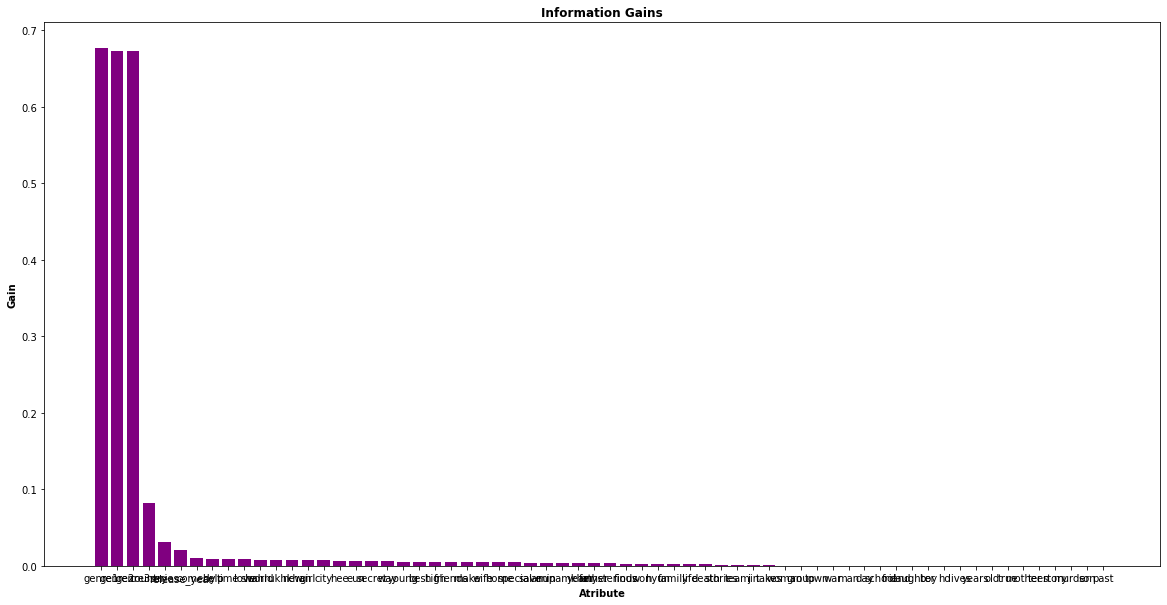

In [18]:
remainingColumns = list(normedMoviesDf.columns)
remainingColumns.remove("type")
informationGain = feature_selection.mutual_info_classif(X = normedMoviesDf[remainingColumns], y = normedMoviesDf['type'])
informationGainDf = pandas.DataFrame()
informationGainDf["atribute"] = remainingColumns
informationGainDf["gain"] = informationGain
informationGainDf.sort_values("gain", axis = 0, ascending = False, inplace = True)
pyplt.figure(figsize  = (20, 10))
pyplt.bar(informationGainDf['atribute'], informationGainDf['gain'], color='purple')
pyplt.xlabel("Atribute", fontweight ='bold')
pyplt.ylabel("Gain", fontweight ='bold')
pyplt.title("Information Gains", fontweight ='bold')
pyplt.show()

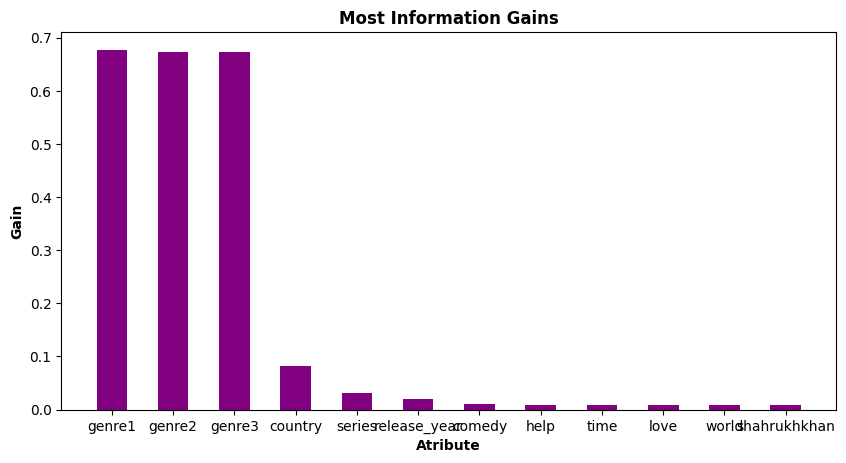

In [19]:
pyplt.figure(figsize=(10, 5), dpi=100)
pyplt.bar(informationGainDf['atribute'][0:12], informationGainDf['gain'][0:12], color='purple', width=.5)
pyplt.xlabel("Atribute", fontweight ='bold')
pyplt.ylabel("Gain", fontweight ='bold')
pyplt.title("Most Information Gains", fontweight ='bold')
pyplt.show()

As we can see the atributes genre1, genre2, genre3, country, series and release_year are the ones with most information gains which means if our decision tree starts and uses these atributes, we will get better model and results. 
From analysing these plots we get that features mentioned above are best ones for our training model.

# Phase 2: Predicting goal and optimizing models
Here we make a model using Decision Tree (in Scikit-Learn library) and then we will optimize it using hyper parameters.
At first we divide data into two data frames for train and test. For each we make two lists, one has all atributes except type and the other just contains type values. We are using all features but we could use a few of them (the ones with most information gains).

In [20]:
remainingColumns = list(normedMoviesDf.columns)
remainingColumns.remove("type")

withoutTypes = normedMoviesDf[remainingColumns].values 
types = normedMoviesDf['type'].values.astype(numpy.uint8)

withoutTypesTrain , withoutTypesTrainTest , typesTrain , typesTest = train_test_split(withoutTypes , types , test_size = 0.2 , random_state = 4)

print(withoutTypesTrain.shape , typesTrain.shape)

(7755, 64) (7755,)


Here we make a model and an fit it with our training data.

In [21]:
model = DecisionTreeClassifier()
model.fit(withoutTypesTrain , typesTrain)

DecisionTreeClassifier()

Here we test our model on test data and calculate its accuracy.

In [22]:
print("Testing Accuracy : " , model.score(withoutTypesTrainTest , typesTest))

Testing Accuracy :  0.9891696750902527


[[1122   13]
 [   8  796]]


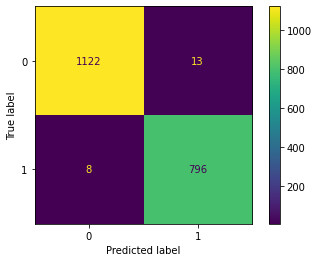

In [23]:
predictions = model.predict(withoutTypesTrainTest)
matrix = confusion_matrix(typesTest , predictions)
print(matrix)
disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
disp.plot()
pyplt.show()

As we can see the accuracy is good because we have few false positive(12) and false negetive (8). On the other hand we have more (1123) true negetive and more (796) true positives which is so good. We may get less accuracy if we have used few features or features with low information gains.

**To improve our model**, we need to obtain the weights of our classes and pass them in our DecisionTreeClassifier model. By so doing, we shall handle the imbalance in the data. To obtain those weights, we use the code below:

In [24]:
typeCounts = dict(normedMoviesDf["type"].value_counts())
for key , value in typeCounts.items():
    typeCounts[key] = value/len(normedMoviesDf)
    classWeights = {}
for key , value in typeCounts.items():
    classWeights[key] = sum(typeCounts.values()) - value / sum(typeCounts.values())

classWeights

{0: 0.41654631730967606, 1: 0.5834536826903239}

# max_depth and min_sample_split:

**max_depth:**
The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.

**min_sample_split:**
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.

Here we draw the tree for a sample max_depth (15) to see the result.

[Text(450.39119980569944, 529.2947368421053, 'X[3] <= 32.5\ngini = 0.486\nsamples = 7755\nvalue = [4521, 3234]'),
 Text(153.23316062176164, 500.68421052631584, 'X[3] <= 19.5\ngini = 0.278\nsamples = 3507\nvalue = [2921, 586]'),
 Text(74.01450777202072, 472.0736842105263, 'X[3] <= 11.5\ngini = 0.5\nsamples = 971\nvalue = [492, 479]'),
 Text(37.00725388601036, 443.46315789473687, 'X[3] <= 3.5\ngini = 0.332\nsamples = 551\nvalue = [435, 116]'),
 Text(27.75544041450777, 414.85263157894735, 'gini = 0.0\nsamples = 103\nvalue = [0, 103]'),
 Text(46.25906735751295, 414.85263157894735, 'X[3] <= 9.5\ngini = 0.056\nsamples = 448\nvalue = [435, 13]'),
 Text(37.00725388601036, 386.2421052631579, 'X[2] <= 1.5\ngini = 0.275\nsamples = 79\nvalue = [66, 13]'),
 Text(18.50362694300518, 357.63157894736844, 'X[2] <= 0.5\ngini = 0.032\nsamples = 61\nvalue = [60, 1]'),
 Text(9.25181347150259, 329.021052631579, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(27.75544041450777, 329.021052631579, 'gini = 0.0

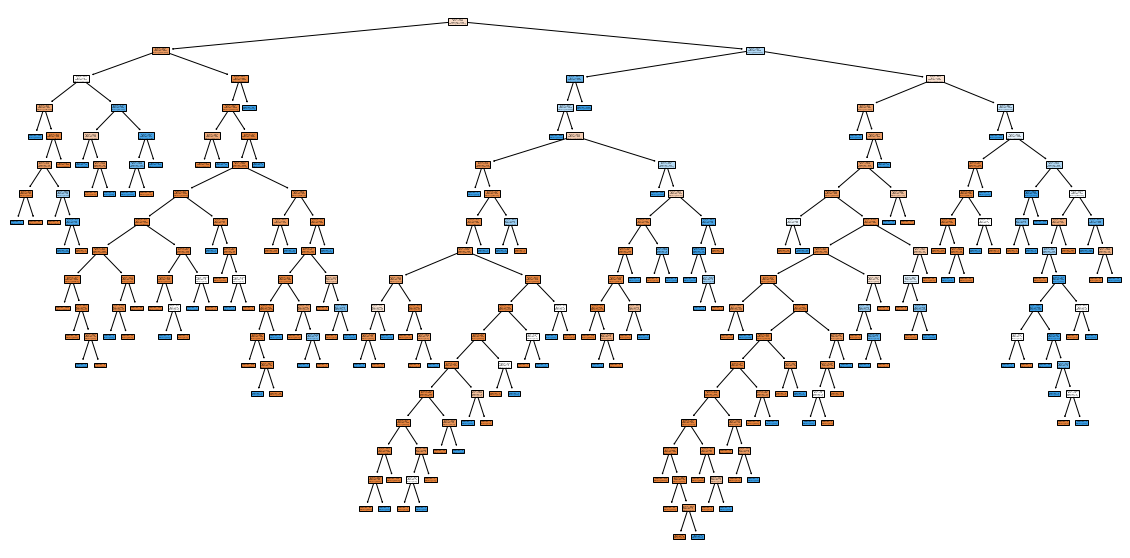

In [25]:
clf = tree.DecisionTreeClassifier(max_depth = 20)
clf.fit(withoutTypesTrain , typesTrain)
pyplt.figure(figsize=(20,10))
# tree.plot_tree(clf, filled=True, fontsize=14)
tree.plot_tree(clf,  filled=True)

Now we create a function to make decistion tree according to its arguments which are maxDepth and minSampleSplit and testSize. 
After creating the function we call it with different arguments to observe which arguments lead us to a better result.

(7755, 64) (7755,)
Testing Accuracy :  0.8540484785972151
[[1009  126]
 [ 157  647]]


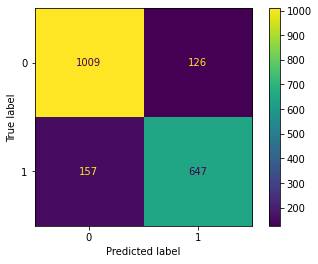

(7755, 64) (7755,)
Testing Accuracy :  0.7555440948942754
[[1033  102]
 [ 372  432]]


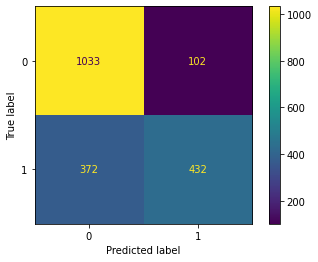

(7755, 64) (7755,)
Testing Accuracy :  0.812790097988654
[[869 266]
 [ 97 707]]


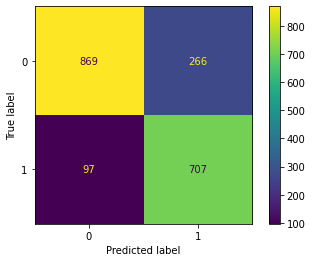

(7755, 64) (7755,)
Testing Accuracy :  0.8540484785972151
[[1009  126]
 [ 157  647]]


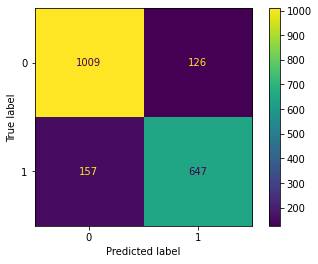

(7755, 64) (7755,)
Testing Accuracy :  0.9236719958741619
[[1056   79]
 [  69  735]]


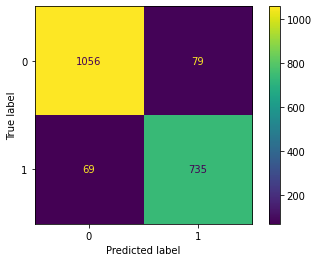

(7755, 64) (7755,)
Testing Accuracy :  0.9896854048478597
[[1124   11]
 [   9  795]]


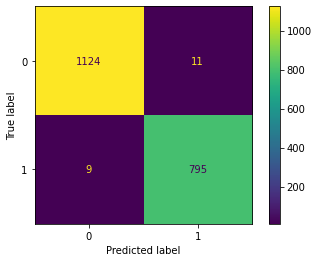

(7755, 64) (7755,)
Testing Accuracy :  0.9896854048478597
[[1125   10]
 [  10  794]]


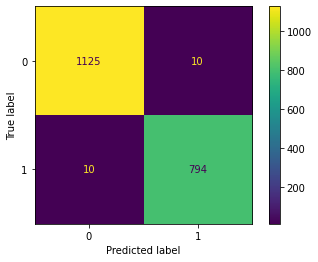

(7755, 64) (7755,)
Testing Accuracy :  0.9896854048478597
[[1125   10]
 [  10  794]]


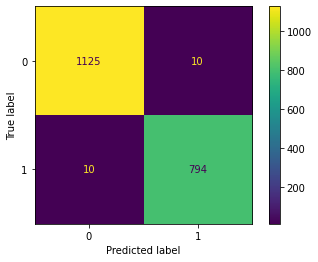

(7755, 64) (7755,)
Testing Accuracy :  0.9912325941206808
[[1127    8]
 [   9  795]]


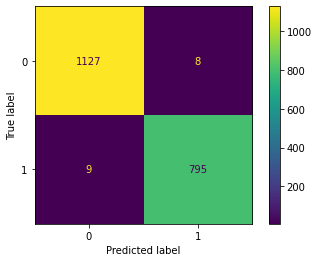

(5816, 64) (5816,)
Testing Accuracy :  0.9863331614234141
[[2202   19]
 [  34 1623]]


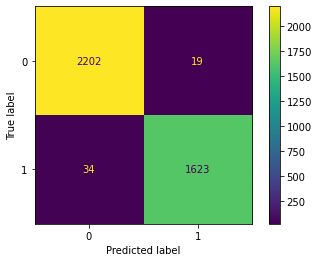

(3877, 64) (3877,)
Testing Accuracy :  0.9749011517964586
[[3297   74]
 [  72 2374]]


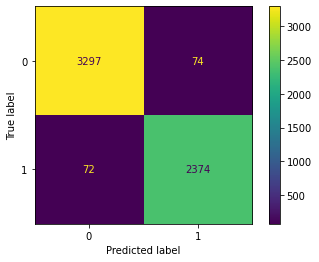

(9500, 64) (9500,)
Testing Accuracy :  0.9896907216494846
[[106   0]
 [  2  86]]


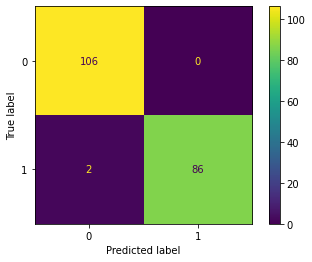

In [26]:
def makeDecisionTree(maxDepth, minSampleSplit, testSize):
    remainingColumns = list(normedMoviesDf.columns)
    remainingColumns.remove("type")

    withoutTypes = normedMoviesDf[remainingColumns].values 
    types = normedMoviesDf['type'].values.astype(numpy.uint8)

    withoutTypesTrain , withoutTypesTrainTest , typesTrain , typesTest = train_test_split(withoutTypes , types , test_size = testSize , random_state = 4)

    print(withoutTypesTrain.shape , typesTrain.shape)

    model = DecisionTreeClassifier(min_samples_split = minSampleSplit, max_depth = maxDepth)
    model.fit(withoutTypesTrain , typesTrain)
    
    print("Testing Accuracy : " , model.score(withoutTypesTrainTest , typesTest))

    predictions = model.predict(withoutTypesTrainTest)
    matrix = confusion_matrix(typesTest , predictions)
    print(matrix)
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
    disp.plot()
    pyplt.show()
    
    
makeDecisionTree(15, 0.1, 0.2)
makeDecisionTree(15, 0.5, 0.2)
makeDecisionTree(3, 0.1, 0.2)
makeDecisionTree(5, 0.1, 0.2)
makeDecisionTree(20, 0.05, 0.2)
makeDecisionTree(20, 5, 0.2)
makeDecisionTree(20, 8, 0.2)
makeDecisionTree(20, 10, 0.2)
makeDecisionTree(20, 4, 0.2)
makeDecisionTree(20, 4, 0.4)
makeDecisionTree(20, 4, 0.6)
makeDecisionTree(20, 4, 0.02)

Here we tested decision tree with different values for max_depth and min_sample_split and for each one we calculated accuracy and plot confusion-matrix. As we can see, if we increase min_sample_split, the accuracy will decreases untill a certain number. After that number as we increase min_sample_split, the accuracy will increases. At a certain number (8) the accuracy reaches its maximum and if we increase min_sample_split more than that the accuracy will decrease again. If we increase max_depth, the accuracy increases and vice versa. So the best choice for max_depth is a big number like 20 and best choice for min_sample_split is 8. With these values we get a better result. 4 is a very good value for min_sample_split too.

# GridSearchCV:
Here we use GridSearchCV to claculate the best values for max_depth and min_sample_split.

In [ ]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 7),
    'min_samples_split': range(1, 3),
    'min_samples_leaf': range(1, 3)
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid= param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(withoutTypesTrain, typesTrain)
grid.best_params_
predictions = model.predict(withoutTypesTrainTest)
matrix = confusion_matrix(typesTest , predictions)
print(matrix)
disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
disp.plot()
pyplt.show()

**min_sample_split:** Here we show how increasing min_sample_split affects the train and test results. As we can see, if min_sample_split decrease the results for train data will be better and as it increase, results for train data will be worse. For test data min_sample_split is better in values 4 and 8.

[2, 3, 4, 5, 6, 7, 8, 9]


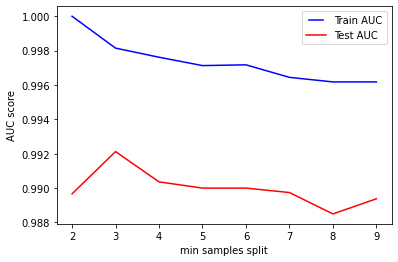

In [28]:
remainingColumns = list(normedMoviesDf.columns)
remainingColumns.remove("type")

withoutTypes = normedMoviesDf[remainingColumns].values 
types = normedMoviesDf['type'].values.astype(numpy.uint8)

withoutTypesTrain , withoutTypesTrainTest , typesTrain , typesTest = train_test_split(withoutTypes , types , test_size = 0.2 , random_state = 4)

model = DecisionTreeClassifier()
model.fit(withoutTypesTrain , typesTrain)

# min_samples_splits = numpy.linspace(2, 10, 10, endpoint=True)
min_samples_splits = list(range(2, 10))
print(min_samples_splits)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split = min_samples_split)
    dt.fit(withoutTypesTrain, typesTrain)
    train_pred = dt.predict(withoutTypesTrain)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(typesTrain, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(withoutTypesTrainTest)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(typesTest, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = pyplt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = pyplt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
pyplt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
pyplt.ylabel('AUC score')
pyplt.xlabel('min samples split')
pyplt.show()

# 1:
20 percent test and 80 percent training data because I thought its fair and will cause a good result. If we choose 98 percent of data for training, the result will be the same (according to previous parts in which we tested it) and accuracy will be 98 which is 1 percent less than the percentage I choosed at first. we know that taking a huge traing data will cause overfitting. 
If we choose 40 percent training data then the accuracy will be 97 percent which is less than 99 percent (80 percent training data). Choosing a small training data may cause underfitting and we wont have a good predictor cause we observed few samples.

# 2:
If max_depth be small we will have a low accuracy for both training and test data. As max_depth increases, the accuracy increases too untill accuracy reaches so close to 100. then it will stop. As we can see in the next plot, if we increase max_depth, the accuracy will be better because we check more features and the result will be more accurate but larger max_depth may cause overfitting too (although in this project we didnt have overfitting for this).

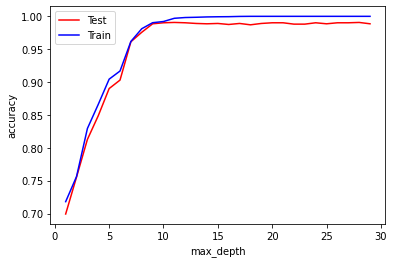

In [29]:
scores = []
scoresTrain = []
maxDepths = list(range(1, 30))
for i in maxDepths:
    remainingColumns = list(normedMoviesDf.columns)
    remainingColumns.remove("type")
    withoutTypes = normedMoviesDf[remainingColumns].values 
    types = normedMoviesDf['type'].values.astype(numpy.uint8)
    withoutTypesTrain , withoutTypesTrainTest , typesTrain , typesTest = train_test_split(withoutTypes , types , test_size = 0.2 , random_state = 4)
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(withoutTypesTrain , typesTrain)
    scores.append(model.score(withoutTypesTrainTest , typesTest))
    scoresTrain.append(model.score(withoutTypesTrain , typesTrain))

line2, = pyplt.plot(maxDepths, scores, 'r', label = "Test")
line2, = pyplt.plot(maxDepths, scoresTrain, 'b', label="Train")
pyplt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
pyplt.ylabel('accuracy')
pyplt.xlabel('max_depth')
pyplt.show()

# Phase 3: Predicting using group learning
As we can see the accuracy rises as we increase max_depth. In the following code and plot we change max_depth and check how the accuracy canges.

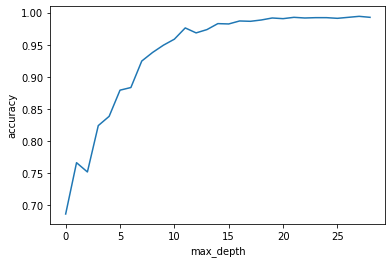

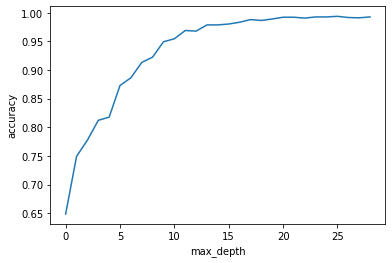

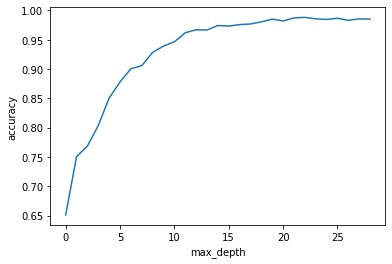

In [30]:
def randomForest1(min_samples_leaf = 1, min_samples_split = 2):
    remainingColumns = list(normedMoviesDf.columns)
    remainingColumns.remove("type")
    withoutTypes = normedMoviesDf[remainingColumns].values 
    types = normedMoviesDf['type'].values.astype(numpy.uint8)
    withoutTypesTrain , withoutTypesTrainTest , typesTrain , typesTest = train_test_split(withoutTypes , types , test_size = 0.2 , random_state = 4)

    scores = []
    for max_depth in range(1, 30):
        clf=RandomForestClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
        clf.fit(withoutTypesTrain, typesTrain)
        y_pred=clf.predict(withoutTypesTrainTest)
        scores.append(metrics.accuracy_score(typesTest, y_pred))

    pyplt.plot(scores)
    pyplt.xlabel('max_depth')
    pyplt.ylabel('accuracy')
    pyplt.show()
    
randomForest1()
randomForest1(1, 5)
randomForest1(3, 2)
# randomForest1(5, 2)

As we can see, increasing max_depth causes better accuracy. We have checked accuracy/max_depth plot for different values of min_sample_split and min_sample_leaf; as we can see the accuracy grows faster with bigger min_sample_leaf and grows slower with bigger min_sample_split. If we choose a bigger value for min_smaple_split, then the result will be better and the accuracy will grow faster.

# Random forest hyperparameters:
**max_depth:** It governs the maximum height upto which the trees inside the forest can grow. It is one of the most important hyperparameters when it comes to increasing the accuracy of the model, as we increase the depth of the tree the model accuracy increases upto a certain limit but then it will start to decrease gradually because of overfitting in the model. It is important to set its value appropriately to avoid overfitting. The default value is set to None, None specifies that the nodes inside the tree will continue to grow until all leaves become pure or all leaves contain less than min_samples_split (another hyperparameter).

**min_samples_split:** It specifies the minimum amount of samples an internal node must hold in order to split into further nodes. If we have a very low value of min_samples_splits then, in this case, our tree will continue to grow and start overfitting. By increasing the value of min_samples_splits we can decrease the total number of splits thus limiting the number of parameters in the model and thus can aid in reducing the overfitting in the model. However, the value should not be kept very large that a number of parameters drop extremely causing the model to underfit. We generally keep min_samples_split value between 2 and 6. However, the default value is set to 2.

**min_samples_leaf:**  It specifies the minimum amount of samples that a node must hold after getting split. It also helps to reduce overfitting when we have ample amount of parameters. Less number of parameters can lead to overfitting also, we should keep in mind that increasing the value to a large number can lead to less number of parameters and in this case model can underfit also. The default value is set to 1.

Now we change min_sample_split and check how accuracy changes.

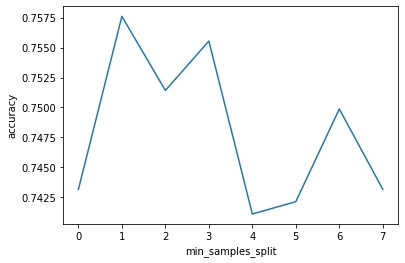

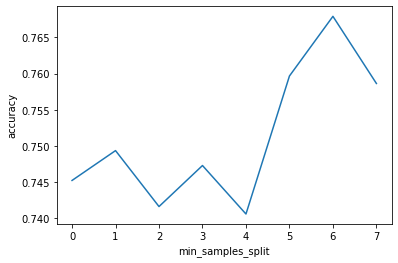

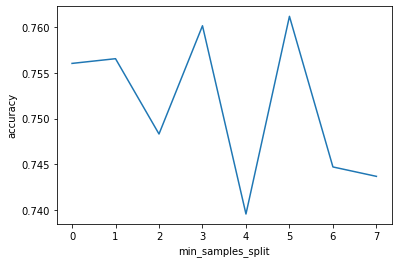

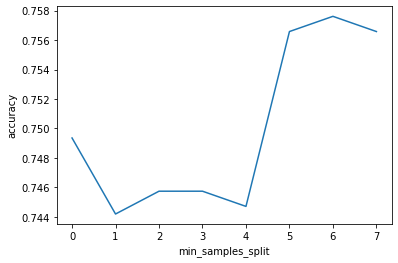

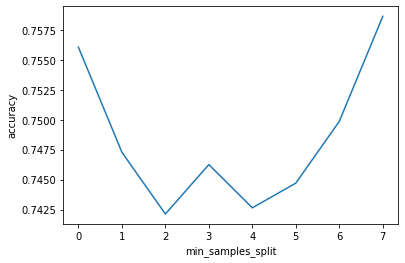

In [31]:
def randomForest2(max_depth = 2, min_samples_leaf=1):
    remainingColumns = list(normedMoviesDf.columns)
    remainingColumns.remove("type")
    withoutTypes = normedMoviesDf[remainingColumns].values 
    types = normedMoviesDf['type'].values.astype(numpy.uint8)
    withoutTypesTrain , withoutTypesTrainTest , typesTrain , typesTest = train_test_split(withoutTypes , types , test_size = 0.2 , random_state = 4)

    scores = []
    for min_samples_split in range(2, 10):
        clf=RandomForestClassifier(max_depth = 2, min_samples_leaf = 1, min_samples_split = min_samples_split)
        clf.fit(withoutTypesTrain, typesTrain)
        y_pred=clf.predict(withoutTypesTrainTest)
        scores.append(metrics.accuracy_score(typesTest, y_pred))

    pyplt.plot(scores)
    pyplt.xlabel('min_samples_split')
    pyplt.ylabel('accuracy')
    pyplt.show()
    
randomForest2()
randomForest2(4, 1)
randomForest2(7, 1)
randomForest2(12, 1)
randomForest2(20, 1)

As we can see the relation between accuracy and min_sample_split depends on the value of max_depth. In the first plot the max_depth is 2 and the accuracy decrease as the min_sample_split increases, after min_sample_split = 1 the accuracy will increase and we have maximum accuracy in 5. In the next two plots, the max_depth is 4 and 7 and as we can see the accuracy increases untill min_sample_split reaches 3 and 5 (we have maximum accuracy in min_sample_split = 3 and 5). About the third plot, the accuracy is so high at first because the max_depth is 12. As we can see the accuracy almost increase as the min_sample_split increases and we have maximum accuracy in min_sample_split = 4. For the last plot, the accuracy is high at small and big values of min_sample_split

# 2:
**bias:** Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

In a decision tree if the tree is shallow then it might have a high bias i.e underfitting. If the tree is too deep then it will have a high variance i.e overfitting. So to achieve a good bias variance trade-off in a decision tree we will have to do some hyper parameter tuning.

**variance:** Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

Random forest is an ensemble bagging technique where number of decision trees combine to give the result. The process is a combination of bootstrapping and aggregation. The main idea behind random forest is that lots of high variance and low bias trees combine to generate a low bias low variance forest. Since it is distibuted over different trees and each tree sees different set of data , therefore random forest in general do not over fit. And since they are made of low bias trees, underfitting also does not happen.

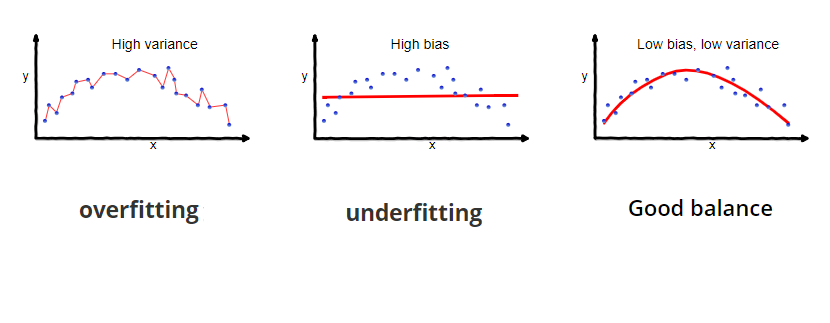

**==>** In this project the pridicting feature is not continues (it has two values 1 and 0) so we cant analize and show it like above plots and check if we have high or low bias and variance but we know the the facts below: 

**Bias and variance in decision tree and random forest:**
decision trees would be worse in variance (higher variance and lower bias) than random forests. The way a decision tree algorithm works is that the data is split again and again as we go down in the tree, so the actual predictions would be made by fewer and fewer data points. Compared to that, random forests aggregate the decisions of multiple trees, and that too, less-correlated trees through randomization, hence the model generalizes better (=> performs more reliably across different datasets = lower variance). Similarly, we are making more simplifying assumptions on random forests to consult only a subset of data and features to fit a single tree, hence higher bias. BTW, similary, a tree with lower height = less reliant on fewer data points generalizes better and and has less variance compared to a deep tree.

Yeah our results somehow agree with the facts above (for random forest we sould have low bias and variance but these values are almost high in our results).